In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from modules import *

succes


In [2]:
# TODO: evaluieren der korrekten window positionen unter zero indexing, was sind die mindest dinger für die grid search windows, input dataen vollenden (z.B. NAs), die iid bootstraps implementieren

# FIXME: 

# NOTE: NA printout currently disabled for debugging, must be looked into later, evaluate why identical bounds from paper are not robust to all parameter combinations
#cache decorator makes the functions non pickleable -> find 

### Testing influence of parameters on window indexes

In [ ]:
#window size dürfen nur gerade zahlen sein, sonst sind grenzen dezimalzahlen
#dadurch, dass der ub nicht inclusive ist, sind die intervalle nicht symmetrisch um den Index m*b
#was wäre eine Lösung? (abwägung zwischen symmetrischem, ungeraden intervall und asymmetrischem, geraden intervall)
#window size 1 hat die beste performance, dass müssen wir also eigentlich berücksichtigen
#-> wie verhalten sich die intervallgrenzen bei window size 1? mit den decimalzahlengrenzen
N = 313
b = 8
w = 4
M = int(np.ceil(N / b))

# Compute J_1m and J_2m
J_1m_values = np.maximum(0, np.minimum(np.arange(M) * b - w/2, N-b - w/2))# Shape: (M,)
print(J_1m_values)

[  0.   6.  14.  22.  30.  38.  46.  54.  62.  70.  78.  86.  94. 102.
 110. 118. 126. 134. 142. 150. 158. 166. 174. 182. 190. 198. 206. 214.
 222. 230. 238. 246. 254. 262. 270. 278. 286. 294. 302. 303.]


[  2.  10.  18.  26.  34.  42.  50.  58.  66.  74.  82.  90.  98. 106.
 114. 122. 130. 138. 146. 154. 162. 170. 178. 186. 194. 202. 210. 218.
 226. 234. 242. 250. 258. 266. 274. 282. 290. 298. 305. 305.]


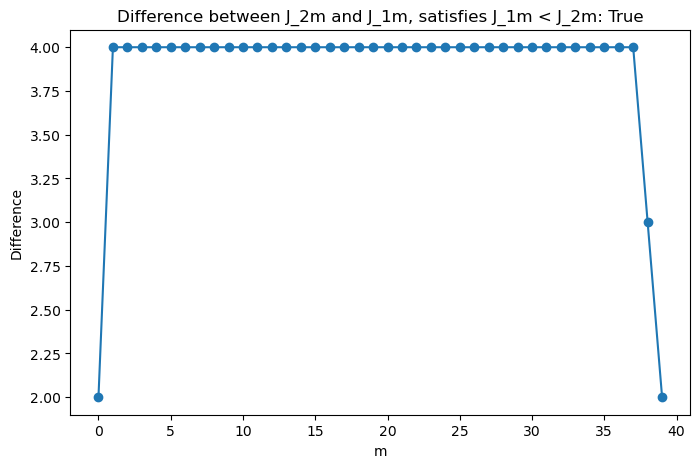

In [29]:

J_2m_values = np.maximum(0, np.minimum(np.arange(M) * b + w/2, N-b))    # Shape: (M,)
print(J_2m_values)

# Compute the difference
difference = J_2m_values - J_1m_values

# Plot the difference
plt.figure(figsize=(8, 5))
plt.plot(range(M), difference, marker='o', linestyle='-', label='J_2m - J_1m')
plt.xlabel('m')
plt.ylabel('Difference')
plt.title(f'Difference between J_2m and J_1m, satisfies J_1m < J_2m: {~np.any(J_1m_values >= J_2m_values)}')
plt.show()

# Metrics
Mathematical formulation for discrete Wasserstein Distance, with $q$ being the quantiles:
$$
W_p(\mu_1, \mu_2) = \left( \int_0^1 \left| F_1^{-1}(q) - F_2^{-1}(q) \right|^p \, dq \right)^{\frac{1}{p}}
$$


In [4]:
GridEvaluation.run(list(InputData.TestData.keys()))

Batch processing and streaming:   0%|          | 0/20 [00:00<?, ?it/s]

succes
succes
succes
succes
succes
succes
succes
succes


# Error Diagnosis

### 1. Optimierung der Parameter
- **Frage:** Was ist die beste Parameterkombination?

### 2. Identifikation von Ausreißern
- **Frage:** Welche Items sind die größten Ausreißer?

### 3. Bias-Analyse
- **Frage:** Haben wir allgemein einen positiven oder negativen Bias? (Test if correction factor might help)

### 4. Einfluss von Parametern auf Bias und Varianz
- **Frage:** Ändern sich Bias und Varianz mit den Parametern, insbesondere mit der Anzahl der Twins?

### 5. Vergleich mit Bootstrap
- **Frage:** Lohnt sich das im Vergleich zum einfachen Bootstrap?

### 6. Ausblick auf Performance-Änderungen
- **Frage:** Wie ändert sich die Performance, wenn die Beobachtungsperiode um 1 Jahr verschoben wird?
  - **Erwartung:** Der Einfluss des Trends wird erhöht.

In [5]:
df_results = pd.read_csv("results/grid_results.csv")

In [12]:
df_results.head()

,TEST_ITEM_COMMUNICATIONKEY,BLOCK_SIZE,WINDOW_SIZE,TWIN_NUMBER,MEAN_SAMPLE,MEAN_TEST,BIAS,VARIANCE,RMSE,MAPE,MAE,WASSERSTEIN
0,716679764,1,1,9,981.0258,564.0,417.0258,11264.699674,20.744153,73.940745,417.0258,425.375462
1,735286989,1,1,7,926.4180,863.0,63.4180,5778.117299,9.949610,9.124171,78.7416,80.466089
2,796628327,1,1,8,254.4206,138.0,116.4206,499.722440,10.887946,84.362754,116.4206,116.980352
3,803656013,1,1,10,979.9256,240.0,739.9256,38887.042673,27.672234,308.302333,739.9256,761.993729
4,804245827,1,1,7,226.1122,145.0,81.1122,1030.435298,9.339869,55.939448,81.1122,83.494155


In [15]:
#1
df_results.groupby(["WINDOW_SIZE", "BLOCK_SIZE"]).median().sort_values("RMSE").reset_index()[["WINDOW_SIZE", "BLOCK_SIZE", "RMSE" ]]

,WINDOW_SIZE,BLOCK_SIZE,RMSE
0,1,1,14.572392
1,5,1,14.611046
2,21,1,14.720391
3,25,1,14.725936
4,29,1,14.741804
...,...,...,...
146,53,28,19.415371
147,45,28,19.493370
148,57,28,19.534255
149,49,28,19.549302


In [16]:
df_results.groupby(["WINDOW_SIZE", "BLOCK_SIZE"]).mean().sort_values("RMSE").reset_index()[["WINDOW_SIZE", "BLOCK_SIZE", "RMSE" ]]

,WINDOW_SIZE,BLOCK_SIZE,RMSE
0,1,1,16.264406
1,5,1,16.301532
2,13,1,16.327967
3,21,1,16.331548
4,9,1,16.332381
...,...,...,...
146,45,28,19.517037
147,49,28,19.534786
148,53,28,19.543273
149,57,28,19.567540


In [17]:
#2 größten ausreißer
df_results.groupby(["TEST_ITEM_COMMUNICATIONKEY"]).mean().sort_values("RMSE", ascending=False).reset_index()[["TEST_ITEM_COMMUNICATIONKEY", "RMSE"]]

,TEST_ITEM_COMMUNICATIONKEY,RMSE
0,829628090,45.772894
1,842058910,42.304990
2,1107699346,37.842761
3,1574713555,37.215915
4,803656013,34.880035
...,...,...
95,856065671,8.581204
96,837717257,8.453874
97,824014002,8.444693
98,1035556462,7.334785


In [10]:
# Bias Analyse
#müssen wir einzeln abfragen -> Dann mit lineplot die entwicklung über die twin_nr zeigen

# Normality test
- clt is defined for iid data
- distributions moments must be finite?
- tune number of iteration until distribution is normal -> helps simplify methods of robust optimization

NameError: name 'results_simple' is not defined

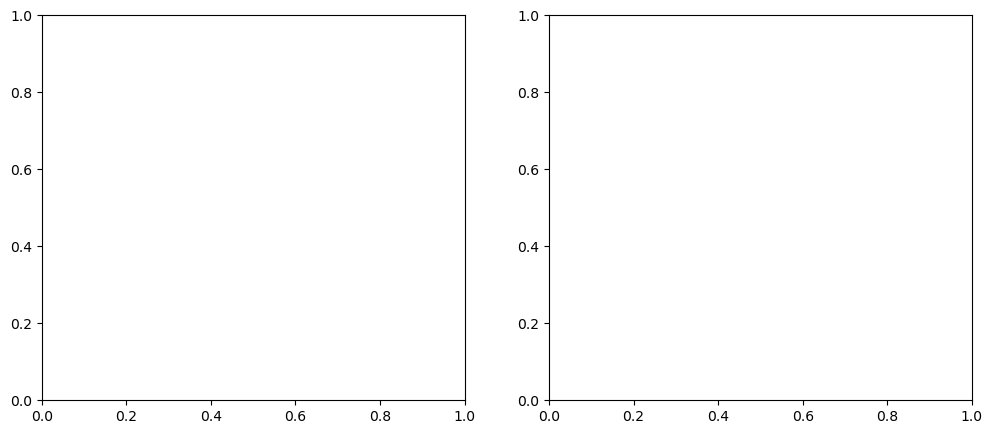

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
ax1.hist(results_simple, bins=50, density=True, alpha=0.6, color='grey', edgecolor='black', label='Bootstrap PDF')
ax1.set_title('Histogram of Bootstrapped Values')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Remove top and right spines for the histogram
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Calculate the normal PDF
x = np.linspace(min(results_simple), max(results_simple), 100)
normal_pdf = stats.norm.pdf(x, loc=np.mean(results_simple), scale=np.sqrt(np.var(results_simple, ddof = 1)))

# Plot the normal PDF
ax1.plot(x, normal_pdf, label='Normal PDF', color='black', linestyle='-')

# Plot the empirical CDF
data_sorted = np.sort(results_simple)
# Calculate the ECDF values
ecdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax2.plot(data_sorted, ecdf, marker='o', linestyle='none', color='grey', label='Bootstrap CDF')

# Remove top and right spines for the CDF
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Calculate the normal CDF
normal_cdf = stats.norm.cdf(x, loc=np.mean(results_simple), scale=np.sqrt(np.var(results_simple, ddof = 1)))

# Plot the normal CDF
ax2.plot(x, normal_cdf, label='Normal CDF', color='black', linestyle='-')

ax2.set_title('Empirical CDF vs Normal CDF')
ax2.set_xlabel('Value')
ax2.set_ylabel('Cumulative Probability')

# Add legends
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.savefig('plots/bootstrap_joint_distribution.svg')
plt.show()


In [ ]:
#H0: the data is normally distributed
#define alpha level
alpha = 0.05

In [ ]:
#generate integer samples from normal distribution
norm_samples = np.random.normal(50, 25, 100000).astype(int)

In [ ]:
norm_samples = np.random.normal(50, 5, 100000).astype(int)
_, p_value = stats.normaltest(norm_samples)
print(p_value)
if p_value > alpha:
    print("Fail to reject the null hypothesis: The data appears to be normally distributed.")
else:
    print("Reject the null hypothesis: The data does NOT appear to be normally distributed.")

In [ ]:
# Warning: for N > 5000, computed p-value may not be accurate.
_, p_value = stats.shapiro(results_simple)
print(p_value)
if p_value > alpha:
    print("Fail to reject the null hypothesis: The data appears to be normally distributed.")
else:
    print("Reject the null hypothesis: The data does not appear to be normally distributed.")